<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/GCAF/Raster_Vector_DataProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Raster & Vector Data Processing

In [ ]:
!pip install rioxarray

In [ ]:

from osgeo import gdal
import pprint
import os
import matplotlib.pyplot as plt
import numpy as np
from osgeo import osr
import math
import geopandas as gpd
import pandas as pd
import rioxarray as rxr
import seaborn as sns

from shapely.geometry import Polygon
import fiona

In [ ]:



bhuvan_2021 = '/content/sample_data/OCM2_NDVI_BAR_V02_01.TIF'
ds =gdal.Open(bhuvan_2021)
ds

bhuvan_2 = '/content/sample_data/ocm2_ndvi_jan01to152021_v02_01.tif'
ds =gdal.Open(bhuvan_2)
ds2

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fc550eb6e80> >

In [ ]:

ds.GetFileList()

['/content/sample_data/ocm2_ndvi_jan01to152021_v02_01.tif']

In [ ]:


out_put = gdal.Info('/content/sample_data/OCM2_NDVI_BAR_V02_01.TIF', format='json')
out_put

out_put2 = gdal.Info('/content/sample_data/ocm2_ndvi_jan01to152021_v02_01.tif', format='json')
out_put2

{'description': '/content/sample_data/ocm2_ndvi_jan01to152021_v02_01.tif',
 'driverShortName': 'GTiff',
 'driverLongName': 'GeoTIFF',
 'files': ['/content/sample_data/ocm2_ndvi_jan01to152021_v02_01.tif'],
 'size': [6134, 4473],
 'coordinateSystem': {'wkt': 'GEOGCRS["WGS 84",\n    ENSEMBLE["World Geodetic System 1984 ensemble",\n        MEMBER["World Geodetic System 1984 (Transit)"],\n        MEMBER["World Geodetic System 1984 (G730)"],\n        MEMBER["World Geodetic System 1984 (G873)"],\n        MEMBER["World Geodetic System 1984 (G1150)"],\n        MEMBER["World Geodetic System 1984 (G1674)"],\n        MEMBER["World Geodetic System 1984 (G1762)"],\n        MEMBER["World Geodetic System 1984 (G2139)"],\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]],\n        ENSEMBLEACCURACY[2.0]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitude (Lat)",north,\n            ORDE

In [ ]:

ds.RasterXSize

6134

In [ ]:

ds.RasterYSize

4473

In [ ]:

ds.GetGeoTransform()

(56.88453069703869,
 0.009259259328246117,
 0.0,
 43.95189114802944,
 0.0,
 -0.009259259328246117)

In [ ]:


ds.RasterCount

1

In [ ]:


ds.GetMetadata()

{'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)',
 'TIFFTAG_XRESOLUTION': '96',
 'TIFFTAG_YRESOLUTION': '96'}

In [ ]:


ds.GetProjection()

''

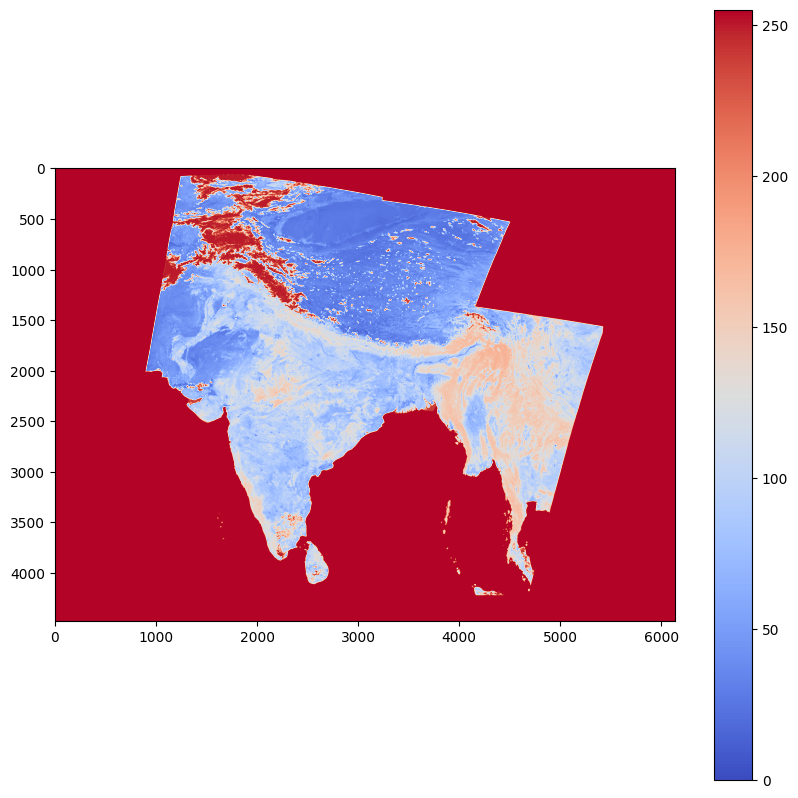

In [ ]:

band = ds.GetRasterBand(1)
Data= band.ReadAsArray()

plt.figure(figsize=(10,10))
plt.imshow(Data, cmap='coolwarm')
plt.colorbar()

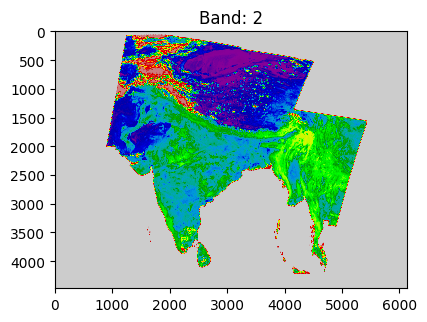

In [ ]:


plt.figure(figsize=(10,10))
for i in range(1, ds.RasterCount+1):
              band = ds.GetRasterBand(i)
              plt.subplot(2,2,i)
              plt.title('Band: '+str(i+1))
              plt.imshow(band.ReadAsArray(), cmap='nipy_spectral')

In [ ]:


dem_im = rxr.open_rasterio('/content/sample_data/OCM2_NDVI_BAR_V02_01.TIF')
dem_im.shape

/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


(3, 495, 332)

In [ ]:

dem_im2= rxr.open_rasterio('/content/sample_data/ocm2_ndvi_jan01to152021_v02_01.tif')
dem_im2.shape

(1, 4473, 6134)

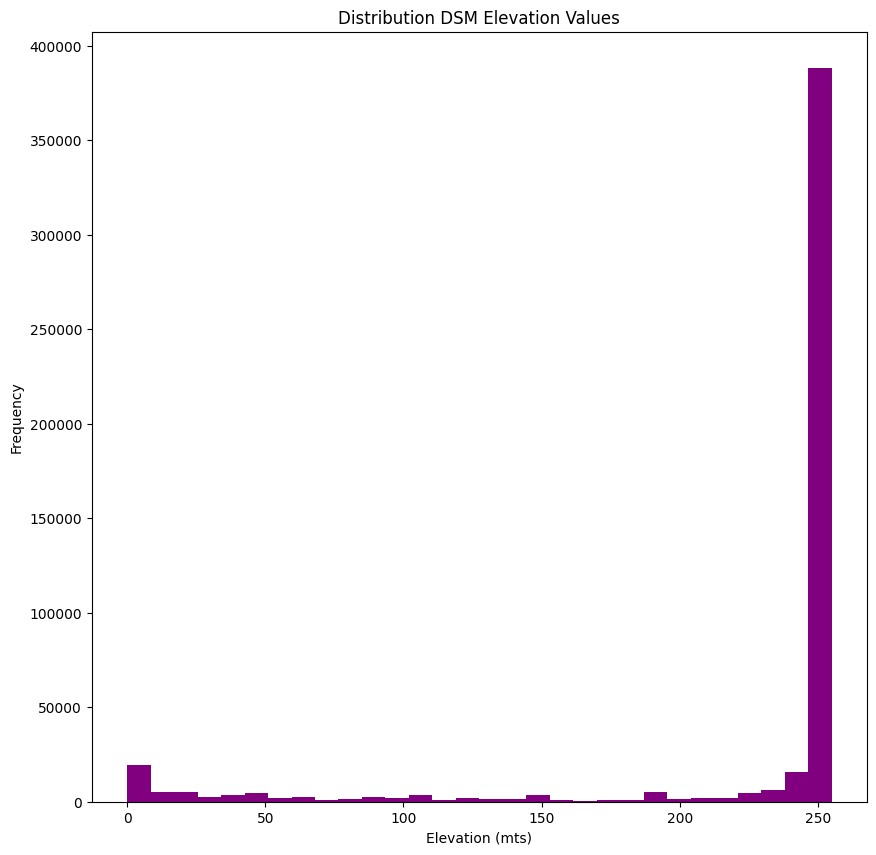

In [ ]:


fig, ax= plt.subplots(figsize=(10,10))
dem_im.plot.hist(ax=ax, color="purple", bins=30)
ax.set(title="Distribution DSM Elevation Values",
       xlabel='Elevation (mts)',
       ylabel='Frequency')
plt.show()

In [ ]:



Fp= pd.read_csv("/content/sample_data/ARPT.TXT", delimiter='\t')
Fp

ARPT_IDENT                NAME  STATE_PROV  ICAO FAA_HOST_ID LOC_HDATUM  \
0       AA30079  REINA BEATRIX INTL         NaN  TNCA           N        WGE   
1       AC44813       V C BIRD INTL         NaN  TAPA           N        NAS   
2       AE00011             AL SAQR         NaN    OM        OM01        NAH   
3       AE01079             ARZANAH         NaN  OMAR           N        WGE   
4       AE04602        AL HAMRA AUX         NaN  OMAH           N        WGE   
...         ...                 ...         ...   ...         ...        ...   
9962    ZI67829         KWEKWE EAST         NaN    FV        FV76        WGE   
9963    ZI74566         HARARE INTL         NaN  FVHA           N        WGE   
9964    ZI81953           CENTENARY         NaN  FVCN           N        WGE   
9965    ZI86610     GWERU THORNHILL         NaN  FVTL           N        WGE   
9966    ZI86629            MHANGURA         NaN    FV        FV77        WGE   

     WGS_DATUM    WGS_LAT   WGS_DLAT    WGS_LONG  ...       MAG_VAR   WAC  \
0          WGE  N12300500  12.501389  W070005480  ...  W009358 0506   707   
1          WGE  N17081230  17.136749  W061473360  ...  W014259 0506   649   
2          WGE  N25451926  25.755349  E055573737  ...  E001334 0806   548   
3          WGE  N24464990  24.780528  E052333580  ...  E001459 0506   547   
4          WGE  N24042633  24.073981  E052274912  ...  E001400 0506   547   
...        ...        ...        ...         ...  ...           ...   ...   
9962       WGE  S19003904 -19.010844  E030013068  ...  W009227 0106  1176   
9963       WGE  S17555450 -17.931806  E031053425  ...  W008284 0106  1176   
9964       WGE  S16440279 -16.734108  E031071922  ...  W007197 0106  1176   
9965       WGE  S19261102 -19.436394  E029514288  ...  W009481 0106  1176   
9966       WGE  S16543649 -16.910136  E030143231  ...  W007207 0106  1176   

     BEACON SECOND_ARPT  OPR_AGY SEC_NAME SEC_ICAO SEC_FAA SEC_OPR_AGY  \
0         Y         NaN       CI      NaN      NaN     NaN         NaN   
1         Y         NaN       CI      NaN      NaN     NaN         NaN   
2       NaN         NaN       UN      NaN      NaN     NaN         NaN   
3       NaN         NaN       PV      NaN      NaN     NaN         NaN   
4       NaN         NaN       MI      NaN      NaN     NaN         NaN   
...     ...         ...      ...      ...      ...     ...         ...   
9962    NaN         NaN       CI      NaN      NaN     NaN         NaN   
9963      Y         NaN       ML      NaN      NaN     NaN         NaN   
9964    NaN         NaN       MI      NaN      NaN     NaN         NaN   
9965    NaN         NaN       MI      NaN      NaN     NaN         NaN   
9966    NaN         NaN       CI      NaN      NaN     NaN         NaN   

     CYCLE_DATE  
0        200610  
1        200607  
2        200610  
3        200602  
4        200510  
...         ...  
9962     200512  
9963     200411  
9964     200101  
9965     200411  
9966     200512  

[9967 rows x 23 columns]

In [ ]:

Fp.shape

(9967, 23)

In [ ]:

len(Fp)

9967

In [ ]:


Fp.describe()

STATE_PROV     WGS_DLAT    WGS_DLONG          ELEV          WAC  \
count  4259.000000  9967.000000  9967.000000   9967.000000  9967.000000   
mean     28.669171    26.924563   -35.301708   1174.831945   532.799538   
std      16.486233    25.091255    79.453414   1547.297599   360.726965   
min       1.000000   -89.999997  -178.297364  -1266.000000     7.000000   
25%      13.000000    17.123555   -94.569309    143.500000   307.000000   
50%      29.000000    35.135000   -73.249506    628.000000   406.000000   
75%      45.000000    42.982128    19.095548   1495.000000   667.500000   
max      56.000000    82.517778   179.339860  13700.000000  1851.000000   

          CYCLE_DATE  
count    9967.000000  
mean   200538.926056  
std        93.682441  
min    199906.000000  
25%    200508.000000  
50%    200602.000000  
75%    200608.000000  
max    200610.000000

In [ ]:

Fp.columns

#INDIA MAP

In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:

Us=gpd.read_file("/content/sample_data/DISTRICT_BOUNDARY.shp")

<Figure size 2000x2000 with 0 Axes>

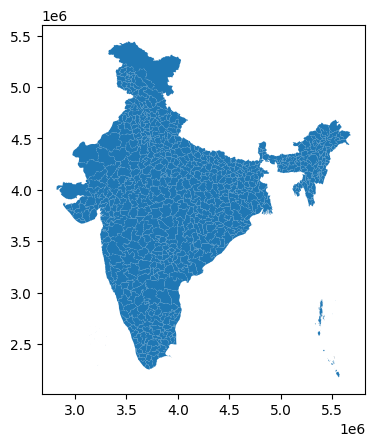

In [ ]:


plt.figure(figsize=(20,20))
Us.plot()
plt.savefig('INDIA.png',dpi=300)

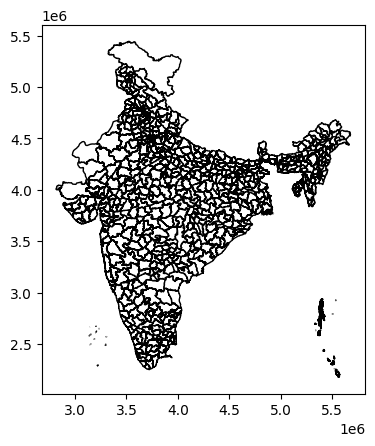

In [ ]:

Us.plot(color='white', edgecolor='black')
plt.savefig('Ind Map Districts.png', dpi=300)

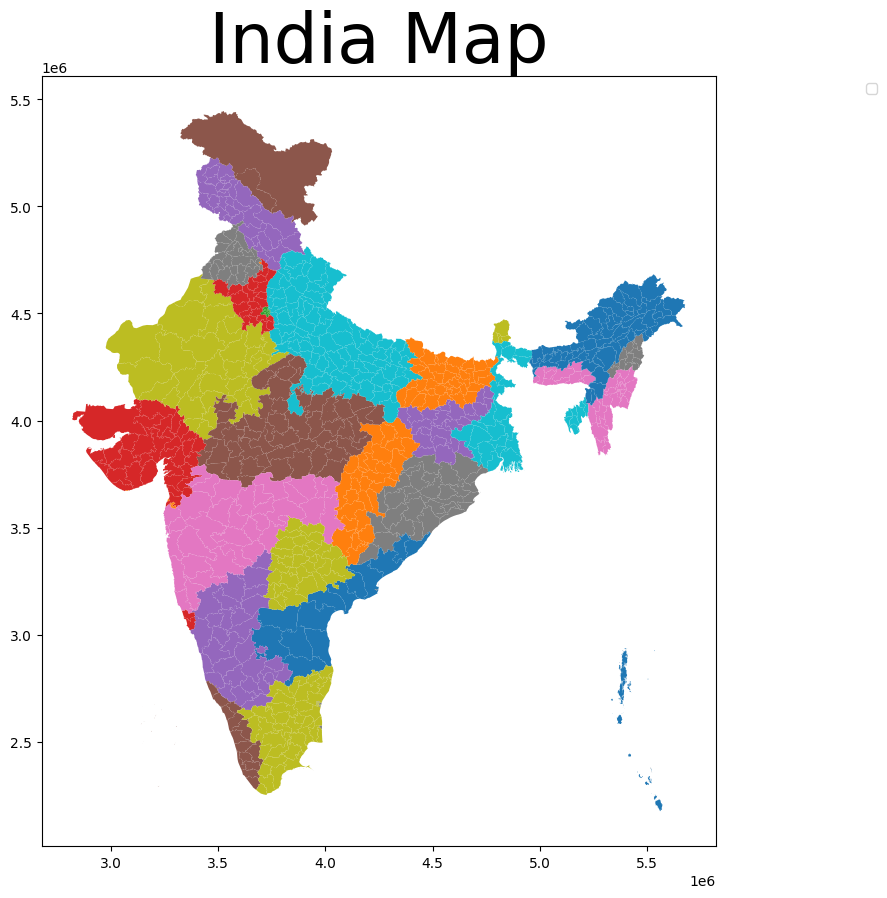

In [ ]:


Shfile=gpd.read_file('/content/sample_data/DISTRICT_BOUNDARY.shp')
Shfile.head()
#brackets {         }
fig, ax=plt.subplots(figsize=(10,10))
Shfile.plot(ax=ax, column='STATE', legend='True')#, legend_kwds={'loc':'upper left'})
plt.legend(loc='best', bbox_to_anchor=(1.25,1.00))
plt.title('India Map', size=50)
plt.savefig('IND MAP STATE.png',dpi=300)
plt.show()

In [ ]:

Shfile.loc[[0]]

District    STATE REMARKS  State_LGD DISTRICT_L     Shape_Leng  \
0    MORBI  GUJAR>T    None         24        673  539476.764723   

     Shape_Area                                           geometry  
0  4.791280e+09  POLYGON ((3108952.090 3942577.010, 3109009.987...

In [ ]:

#Shfile[0, 'STATE'].str.contains('GUJAR>T').rename('GUJARAT')
#Shfile.query("STATE=='GUJAR>T'").rename('GUJARAT')
#Shfile.rename('GUJAR>T':'GUJARAT')
#Shfile.iloc[1:2,1:2].rename('GUJARAT')

Shfile.replace('GUJAR>T','GUJARAT', inplace=True)

In [ ]:

Shfile.loc[[0]]

District    STATE REMARKS  State_LGD DISTRICT_L     Shape_Leng  \
0    MORBI  GUJARAT    None         24        673  539476.764723   

     Shape_Area                                           geometry  
0  4.791280e+09  POLYGON ((3108952.090 3942577.010, 3109009.987...

In [ ]:


len(Shfile)

742

In [ ]:
'''
for i in range(len(Shfile)):
      name= Shfile.loc[i, 'STATE']
      Shfile.loc[[i]].to_file(name+'.shp')'''

"\nfor i in range(len(Shfile)):\n      name= Shfile.loc[i, 'STATE']\n      Shfile.loc[[i]].to_file(name+'.shp')"

In [ ]:

'''
from glob import glob
Shapefiles=glob['.shp']
Shapefiles

for i in Shapefiles:
      Shp = gpd.read_file(i)
      fig, ax = plt.subplots(figsize=(10,10))
      Shp.plot(ax=ax)
      plt.title(Shp.loc[0, 'STATE'])
      plt.show()    '''

"\nfrom glob import glob\nShapefiles=glob['.shp']\nShapefiles\n\nfor i in Shapefiles:\n      Shp = gpd.read_file(i)\n      fig, ax = plt.subplots(figsize=(10,10))\n      Shp.plot(ax=ax)\n      plt.title(Shp.loc[0, 'STATE'])\n      plt.show()    "

In [ ]:

for attributes in Shfile.STATE.unique():
      split_attrib_geometry = []
      empty_geodataframe = gpd.GeoDataFrame()
      for attrib, geom in zip(Shfile.STATE, Shfile.geometry):
            if attrib == attributes:
                 split_attrib_geometry.append(geom)
      empty_geodataframe['geometry']=split_attrib_geometry
      if attributes != None :
          empty_geodataframe.to_file('/content/sample_data/result/'+attributes+'.shp')
      else :
          empty_geodataframe.to_file('/content/sample_data/unknown.shp')

<Figure size 1000x1000 with 0 Axes>

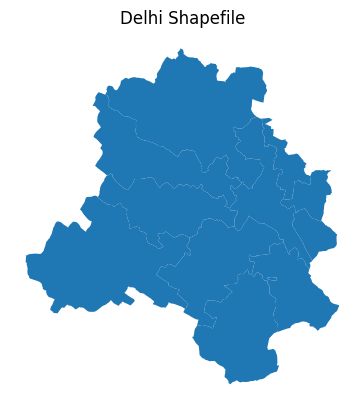

In [ ]:

Del = gpd.read_file('/content/sample_data/resultDELHI.shp')

#fig, ax = plt.subplots(1,1, figsize=(10,10))
#plt.imshow(Del)
plt.figure(figsize=(10,10))
Del.plot()
plt.title('Delhi Shapefile')
plt.axis('off')
plt.show()

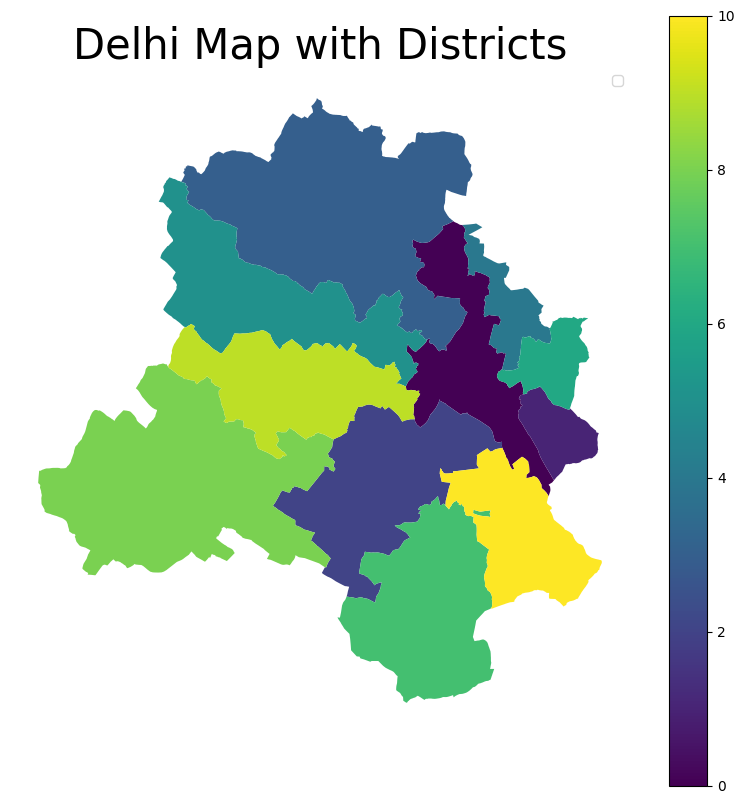

In [ ]:


fig, ax = plt.subplots(1,1, figsize=(10,10))
Del.plot(ax = ax, column='FID', legend='True')
plt.legend(loc='best')
plt.axis('off')
plt.title('Delhi Map with Districts', size= 30)
plt.savefig('Delhi.png',dpi=300)
plt.show()

In [ ]:

Del

FID                                           geometry
0     0  POLYGON ((3732375.445 4523112.644, 3732462.571...
1     1  POLYGON ((3739242.427 4509089.695, 3739298.449...
2     2  POLYGON ((3731048.760 4507641.964, 3731083.918...
3     3  POLYGON ((3721508.765 4532652.788, 3721586.729...
4     4  POLYGON ((3734417.720 4521490.478, 3734432.487...
5     5  POLYGON ((3708061.525 4526899.364, 3708186.676...
6     6  POLYGON ((3742394.050 4515039.869, 3742413.698...
7     7  MULTIPOLYGON (((3734047.026 4498276.116, 37340...
8     8  POLYGON ((3706970.823 4510942.969, 3706988.007...
9     9  POLYGON ((3709325.377 4514224.773, 3709312.678...
10   10  POLYGON ((3736134.734 4503535.378, 3736181.922...

<Figure size 1000x1000 with 0 Axes>

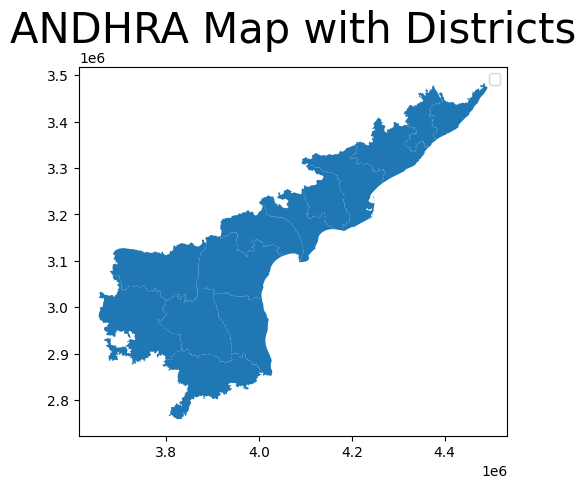

In [ ]:


Apsf= gpd.read_file('/content/sample_data/resultANDHRA PRADESH.shp')
plt.figure(figsize=(10,10))
#Apsf.plot(ax = ax, column='FID', legend='True')
Apsf.plot()
plt.legend(loc='best')
#plt.axis('off')
plt.title('ANDHRA Map with Districts', size= 30)
plt.savefig('Andhra.png',dpi=300)
plt.show()

In [ ]:

Apsf

FID                                           geometry
0     0  POLYGON ((3694781.044 3069048.407, 3694858.114...
1     1  MULTIPOLYGON (((3855438.914 2899547.123, 38554...
2     2  POLYGON ((3886748.954 3044745.301, 3886973.787...
3     3  POLYGON ((4207004.822 3349455.821, 4207048.225...
4     4  POLYGON ((4010990.733 3218825.135, 4011052.076...
5     5  POLYGON ((4064691.667 3252830.384, 4064757.010...
6     6  POLYGON ((3882587.730 3138541.047, 3882719.987...
7     7  POLYGON ((3932565.113 3028679.859, 3932574.708...
8     8  POLYGON ((3951864.916 3160825.609, 3952084.706...
9     9  POLYGON ((4484061.304 3482639.720, 4484153.303...
10   10  POLYGON ((4259266.312 3409012.798, 4259267.245...
11   11  POLYGON ((4376491.271 3478014.469, 4376482.476...
12   12  POLYGON ((4104522.206 3307249.077, 4105432.204...

In [ ]:


Us

District    STATE                 REMARKS  State_LGD  \
0                      MORBI  GUJAR>T                    None         24   
1                  AHMAD>B>D  GUJAR>T                    None         24   
2                      >NAND  GUJAR>T                    None         24   
3            DEVBHUMI DW>RKA  GUJAR>T                    None         24   
4                   J>MNAGAR  GUJAR>T                    None         24   
..                       ...      ...                     ...        ...   
737                 SONITPUR    ASSAM            NOT VERIFIED         18   
738  SOUTH SALMARA MANCACHAR    ASSAM  Not Verified on Ground         18   
739                 TINSUKIA    ASSAM                    None         18   
740                 UDALGURI    ASSAM                    None         18   
741       WEST KARBI ANGLONG    ASSAM  Not Verified on Ground         18   

    DISTRICT_L     Shape_Leng    Shape_Area  \
0          673  539476.764723  4.791280e+09   
1          438  857254.094647  6.966374e+09   
2          440  393046.690523  3.054307e+09   
3          674  661732.986530  4.002784e+09   
4          447  737428.071884  5.694271e+09   
..         ...            ...           ...   
737        301  302021.098402  3.318736e+09   
738        707  234231.827116  6.578689e+08   
739        302  419712.540770  3.677172e+09   
740        617  363765.338478  1.977228e+09   
741        710  430785.104037  2.957340e+09   

                                              geometry  
0    POLYGON ((3108952.090 3942577.010, 3109009.987...  
1    POLYGON ((3193648.356 3920619.089, 3193646.392...  
2    POLYGON ((3297696.184 3879979.348, 3297775.311...  
3    MULTIPOLYGON (((2924145.687 3865429.524, 29241...  
4    MULTIPOLYGON (((3044918.968 3859136.847, 30448...  
..                                                 ...  
737  POLYGON ((5241897.499 4385282.039, 5243409.981...  
738  POLYGON ((4988269.325 4251081.242, 4988430.793...  
739  POLYGON ((5541230.356 4517926.623, 5541082.494...  
740  POLYGON ((5202753.865 4367670.325, 5202752.694...  
741  POLYGON ((5227010.460 4288318.418, 5227025.780...  

[742 rows x 8 columns]

In [ ]:



Us['STATE']#.str.contains('andhra')#.ignorecase()

0      GUJAR>T
1      GUJAR>T
2      GUJAR>T
3      GUJAR>T
4      GUJAR>T
        ...   
737      ASSAM
738      ASSAM
739      ASSAM
740      ASSAM
741      ASSAM
Name: STATE, Length: 742, dtype: object

In [ ]:

Us.columns

Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [ ]:

Us.query("District=='Nellore'").count()

District      0
STATE         0
REMARKS       0
State_LGD     0
DISTRICT_L    0
Shape_Leng    0
Shape_Area    0
geometry      0
dtype: int64

In [ ]:


Us.District

0                        MORBI
1                    AHMAD>B>D
2                        >NAND
3              DEVBHUMI DW>RKA
4                     J>MNAGAR
                ...           
737                   SONITPUR
738    SOUTH SALMARA MANCACHAR
739                   TINSUKIA
740                   UDALGURI
741         WEST KARBI ANGLONG
Name: District, Length: 742, dtype: object

In [ ]:

Us.STATE.nunique()

40

In [ ]:


Us.STATE.unique()

array(['GUJAR>T', 'MADHYA PRADESH', 'UTTAR PRADESH', 'R>JASTH>N',
       'KERALA', 'DISPUTED (MADHYA PRADESH & GUJAR>T)', 'UTTAR>KHAND',
       'ANDHRA PRADESH', 'ODISHA', 'KARN>TAKA', 'CHHATT|SGARH',
       'HIM>CHAL PRADESH', 'MANIPUR', 'JH>RKHAND', 'DELHI', 'MIZORAM',
       'CHAND|GARH', 'D>DRA & NAGAR HAVELI & DAM>N & DIU', 'TRIPURA',
       'SIKKIM', 'MEGH>LAYA', 'DISPUTED (MADHYA PRADESH & R>JASTH>N)',
       'PUDUCHERRY', 'LAKSHADWEEP',
       'DISPUTED (WEST BENGAL , BIH>R & JH>RKHAND)', 'ANDAMAN & NICOBAR',
       'GOA', 'JAMMU AND KASHM|R', 'LAD>KH', 'TELANG>NA', 'MAH>R>SHTRA',
       'WEST BENGAL', 'HARY>NA', 'PUNJAB', 'ARUN>CHAL PRADESH', 'BIH>R',
       'N>G>LAND', 'TAMIL N>DU', 'DISPUTED (R>JATH>N & GUJAR>T)', 'ASSAM'],
      dtype=object)

In [ ]:

Us.query("STATE=='ANDHRA PRADESH'")#265

District           STATE REMARKS  State_LGD DISTRICT_L  \
24                 ANANTAPUR  ANDHRA PRADESH    None         28        502   
96                  CHITTOOR  ANDHRA PRADESH    None         28        503   
99              Y S R KADAPA  ANDHRA PRADESH    None         28        504   
130            EAST GODAVARI  ANDHRA PRADESH    None         28        505   
155                   GUNTUR  ANDHRA PRADESH    None         28        506   
227                  KRISHNA  ANDHRA PRADESH    None         28        510   
229                  KURNOOL  ANDHRA PRADESH    None         28        511   
265  POTTI SRIRAMULU NELLORE  ANDHRA PRADESH    None         28        515   
287                 PRAKASAM  ANDHRA PRADESH    None         28        517   
351               SRIKAKULAM  ANDHRA PRADESH    None         28        519   
378            VISAKHAPATNAM  ANDHRA PRADESH    None         28        520   
379             VIZIANAGARAM  ANDHRA PRADESH    None         28        521   
384            WEST GODAVARI  ANDHRA PRADESH    None         28        523   

       Shape_Leng    Shape_Area  \
24   1.524560e+06  1.916556e+10   
96   1.287744e+06  1.490755e+10   
99   7.961446e+05  1.515527e+10   
130  1.004318e+06  1.258982e+10   
155  8.006491e+05  1.115990e+10   
227  8.321268e+05  8.561151e+09   
229  8.946513e+05  1.707755e+10   
265  6.691818e+05  1.305648e+10   
287  8.753620e+05  1.729462e+10   
351  6.911401e+05  5.663015e+09   
378  9.771036e+05  1.125754e+10   
379  8.260838e+05  5.964663e+09   
384  6.226194e+05  8.121098e+09   

                                              geometry  
24   POLYGON ((3694781.044 3069048.407, 3694858.114...  
96   MULTIPOLYGON (((3855438.914 2899547.123, 38554...  
99   POLYGON ((3886748.954 3044745.301, 3886973.787...  
130  POLYGON ((4207004.822 3349455.821, 4207048.225...  
155  POLYGON ((4010990.733 3218825.135, 4011052.076...  
227  POLYGON ((4064691.667 3252830.384, 4064757.010...  
229  POLYGON ((3882587.730 3138541.047, 3882719.987...  
265  POLYGON ((3932565.113 3028679.859, 3932574.708...  
287  POLYGON ((3951864.916 3160825.609, 3952084.706...  
351  POLYGON ((4484061.304 3482639.720, 4484153.303...  
378  POLYGON ((4259266.312 3409012.798, 4259267.245...  
379  POLYGON ((4376491.271 3478014.469, 4376482.476...  
384  POLYGON ((4104522.206 3307249.077, 4105432.204...

In [ ]:


Us.query("District=='POTTI SRIRAMULU NELLORE'")#265

District           STATE REMARKS  State_LGD DISTRICT_L  \
265  POTTI SRIRAMULU NELLORE  ANDHRA PRADESH    None         28        515   

        Shape_Leng    Shape_Area  \
265  669181.757083  1.305648e+10   

                                              geometry  
265  POLYGON ((3932565.113 3028679.859, 3932574.708...

In [ ]:

Us.describe()

State_LGD    Shape_Leng    Shape_Area
count  742.000000  7.420000e+02  7.420000e+02
mean    17.797844  4.733661e+05  4.284163e+09
std     10.034332  2.773417e+05  6.655170e+09
min      0.000000  4.472646e+03  6.901054e+05
25%      9.000000  3.106391e+05  1.939156e+09
50%     18.000000  4.233099e+05  3.211114e+09
75%     24.000000  5.818102e+05  5.005494e+09
max     38.000000  3.197190e+06  1.539267e+11

In [ ]:

Us.shape

(742, 8)

In [ ]:


Us.head(10)

District    STATE REMARKS  State_LGD DISTRICT_L    Shape_Leng  \
0            MORBI  GUJAR>T    None         24        673  5.394768e+05   
1        AHMAD>B>D  GUJAR>T    None         24        438  8.572541e+05   
2            >NAND  GUJAR>T    None         24        440  3.930467e+05   
3  DEVBHUMI DW>RKA  GUJAR>T    None         24        674  6.617330e+05   
4         J>MNAGAR  GUJAR>T    None         24        447  7.374281e+05   
5          KACHCHH  GUJAR>T    None         24        449  2.097007e+06   
6        BH>VNAGAR  GUJAR>T    None         24        443  5.050122e+05   
7          BHAR@CH  GUJAR>T    None         24        442  8.025799e+05   
8            S@RAT  GUJAR>T    None         24        459  5.230863e+05   
9          NAVS>RI  GUJAR>T    None         24        453  3.275102e+05   

     Shape_Area                                           geometry  
0  4.791280e+09  POLYGON ((3108952.090 3942577.010, 3109009.987...  
1  6.966374e+09  POLYGON ((3193648.356 3920619.089, 3193646.392...  
2  3.054307e+09  POLYGON ((3297696.184 3879979.348, 3297775.311...  
3  4.002784e+09  MULTIPOLYGON (((2924145.687 3865429.524, 29241...  
4  5.694271e+09  MULTIPOLYGON (((3044918.968 3859136.847, 30448...  
5  3.913165e+10  MULTIPOLYGON (((3022570.473 3944081.402, 30225...  
6  6.514338e+09  MULTIPOLYGON (((3224033.340 3759508.682, 32239...  
7  4.745943e+09  MULTIPOLYGON (((3265674.825 3764366.597, 32657...  
8  4.175888e+09  POLYGON ((3295065.918 3752923.858, 3295235.115...  
9  2.126084e+09  POLYGON ((3266101.911 3699818.493, 3266295.418...

In [ ]:

Nlr=Us[Us['District']=='POTTI SRIRAMULU NELLORE']
Nlr.to_file('Nellore.shp')

<Figure size 1000x1500 with 0 Axes>

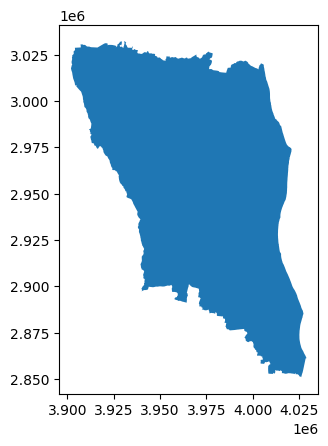

In [ ]:


Nld=gpd.read_file('/content/Nellore.shp')
plt.figure(figsize=(10,15))
Nld.plot()
plt.savefig('Nellore.png',dpi=300)
plt.show()

In [ ]:

#Ap=Us.query("STATE='ANDHRA PRADESH'")
#Us["geometry"].plot()

In [ ]:
Us.query("STATE=='KERALA'")

District   STATE REMARKS  State_LGD DISTRICT_L     Shape_Leng  \
15            >LAPPUZHA  KERALA    None         32        554  295137.808916   
133           ERN>KULAM  KERALA    None         32        555  414199.277363   
169              IDUKKI  KERALA    None         32        556  578310.550974   
198              KANN@R  KERALA    None         32        557  339137.096022   
203           K>SARAGOD  KERALA    None         32        558  344680.788408   
218              KOLLAM  KERALA    None         32        559  351983.519476   
225            KOTTAYAM  KERALA    None         32        560  322325.875322   
226           KOZHIKODE  KERALA    None         32        561  296315.819185   
241          MALAPPURAM  KERALA    None         32        562  405137.235747   
278            P>LAKK>D  KERALA    None         32        563  552162.549972   
284      PATTANAMTHITTA  KERALA    None         32        564  408012.025134   
360  THIRUVANANTHAPURAM  KERALA    None         32        565  284814.505496   
361             TRISS@R  KERALA    None         32        566  401612.683888   
380             WAYANAD  KERALA    None         32        567  284707.686800   

       Shape_Area                                           geometry  
15   1.453745e+09  POLYGON ((3593988.310 2457422.653, 3594125.700...  
133  3.115071e+09  POLYGON ((3623009.655 2503722.233, 3623092.063...  
169  4.444596e+09  POLYGON ((3688405.895 2508990.151, 3688566.645...  
198  2.976763e+09  POLYGON ((3507095.872 2729431.795, 3507133.102...  
203  1.992999e+09  POLYGON ((3501876.732 2751773.801, 3501877.246...  
218  2.552846e+09  POLYGON ((3661959.513 2374709.328, 3662131.880...  
225  2.253783e+09  POLYGON ((3626493.531 2453946.967, 3626393.803...  
226  2.364872e+09  POLYGON ((3539301.535 2672783.514, 3539380.340...  
241  3.589215e+09  POLYGON ((3588344.478 2641303.650, 3588337.129...  
278  4.537724e+09  POLYGON ((3638864.863 2608029.212, 3638875.966...  
284  2.716778e+09  POLYGON ((3629611.005 2412353.304, 3629621.599...  
360  2.260982e+09  POLYGON ((3641840.955 2341678.342, 3641901.379...  
361  3.066580e+09  POLYGON ((3581258.098 2558819.159, 3581522.529...  
380  2.142432e+09  POLYGON ((3575921.376 2691793.490, 3575935.267...

In [ ]:
Waynd=Us[Us['District']=='WAYANAD']
Waynd.to_file("Wayanad.shp")

<Figure size 1000x1500 with 0 Axes>

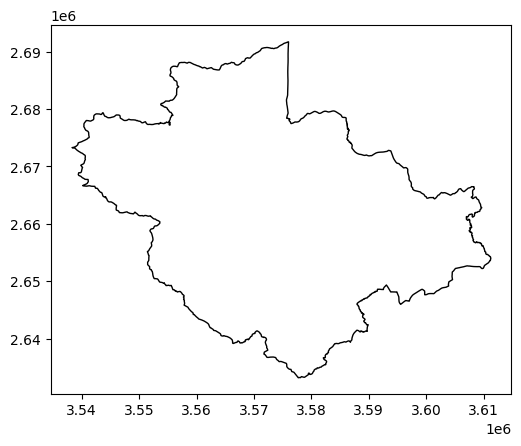

In [ ]:
Wynd=gpd.read_file('/content/Wayanad.shp')
plt.figure(figsize=(10,15))
Wynd.plot(facecolor='white', edgecolor='Black')
plt.savefig('Wayanad.png',dpi=300)
plt.show()

In [ ]:


#/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND2.tif
#/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND3.tif
#/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND4.tif
#/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND5.tif

Bh_4bnd2=gdal.Open('/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND2.tif')
Bh_4bnd3=gdal.Open('/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND3.tif')
Bh_4bnd4=gdal.Open('/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND4.tif')
Bh_4bnd5=gdal.Open('/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND5.tif')

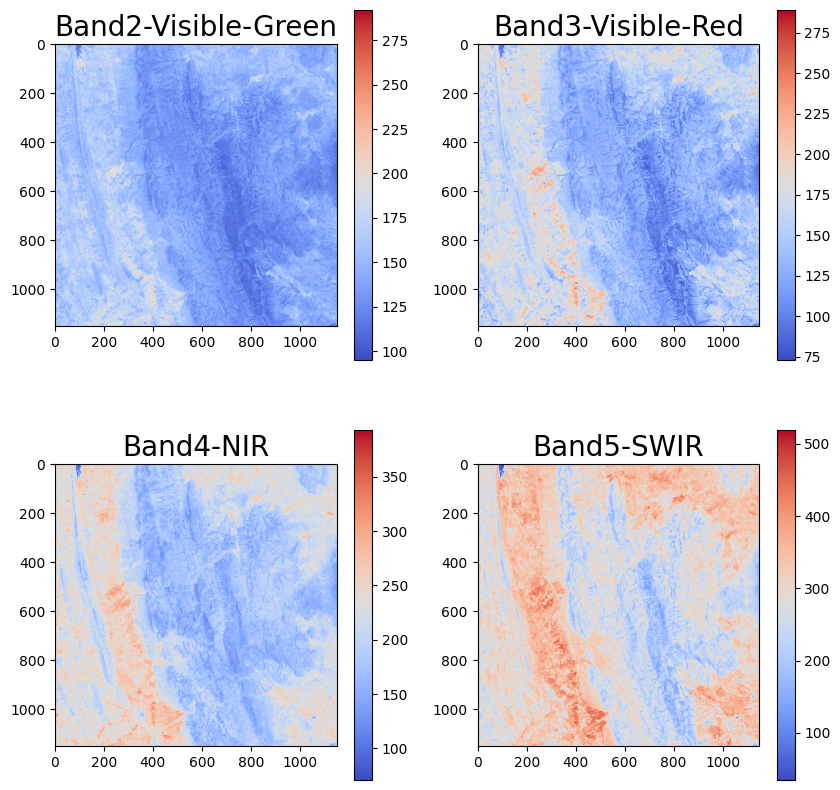

In [ ]:


B2=Bh_4bnd2.ReadAsArray()
B3=Bh_4bnd3.ReadAsArray()
B4=Bh_4bnd4.ReadAsArray()
B5=Bh_4bnd5.ReadAsArray()


plt.subplots(2,2, figsize=(10,10))

plt.subplot(2,2,1)
plt.title('Band2-Visible-Green', size=20)
plt.imshow(B2, cmap='coolwarm')#RdBu
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Band3-Visible-Red', size=20)
plt.imshow(B3, cmap='coolwarm')#OrRd
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Band4-NIR',size=20)
plt.imshow(B4, cmap='coolwarm')
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Band5-SWIR', size=20)
plt.imshow(B5, cmap='coolwarm')#nipy_spectral
plt.colorbar()

plt.show()

In [ ]:

gdal.Info('/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND2.tif',format='json')

{'description': '/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND2.tif',
 'driverShortName': 'GTiff',
 'driverLongName': 'GeoTIFF',
 'files': ['/content/sample_data/L3-ND44H01-101-062-06Apr19-BAND2.tif'],
 'size': [1151, 1151],
 'coordinateSystem': {'wkt': 'GEOGCRS["WGS 84",\n    ENSEMBLE["World Geodetic System 1984 ensemble",\n        MEMBER["World Geodetic System 1984 (Transit)"],\n        MEMBER["World Geodetic System 1984 (G730)"],\n        MEMBER["World Geodetic System 1984 (G873)"],\n        MEMBER["World Geodetic System 1984 (G1150)"],\n        MEMBER["World Geodetic System 1984 (G1674)"],\n        MEMBER["World Geodetic System 1984 (G1762)"],\n        MEMBER["World Geodetic System 1984 (G2139)"],\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]],\n        ENSEMBLEACCURACY[2.0]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitude (Lat)",north,\n            

In [ ]:


print(B2.shape,'\n',B3.shape,'\n',B4.shape,'\n',B5.shape)

(1151, 1151) 
 (1151, 1151) 
 (1151, 1151) 
 (1151, 1151)


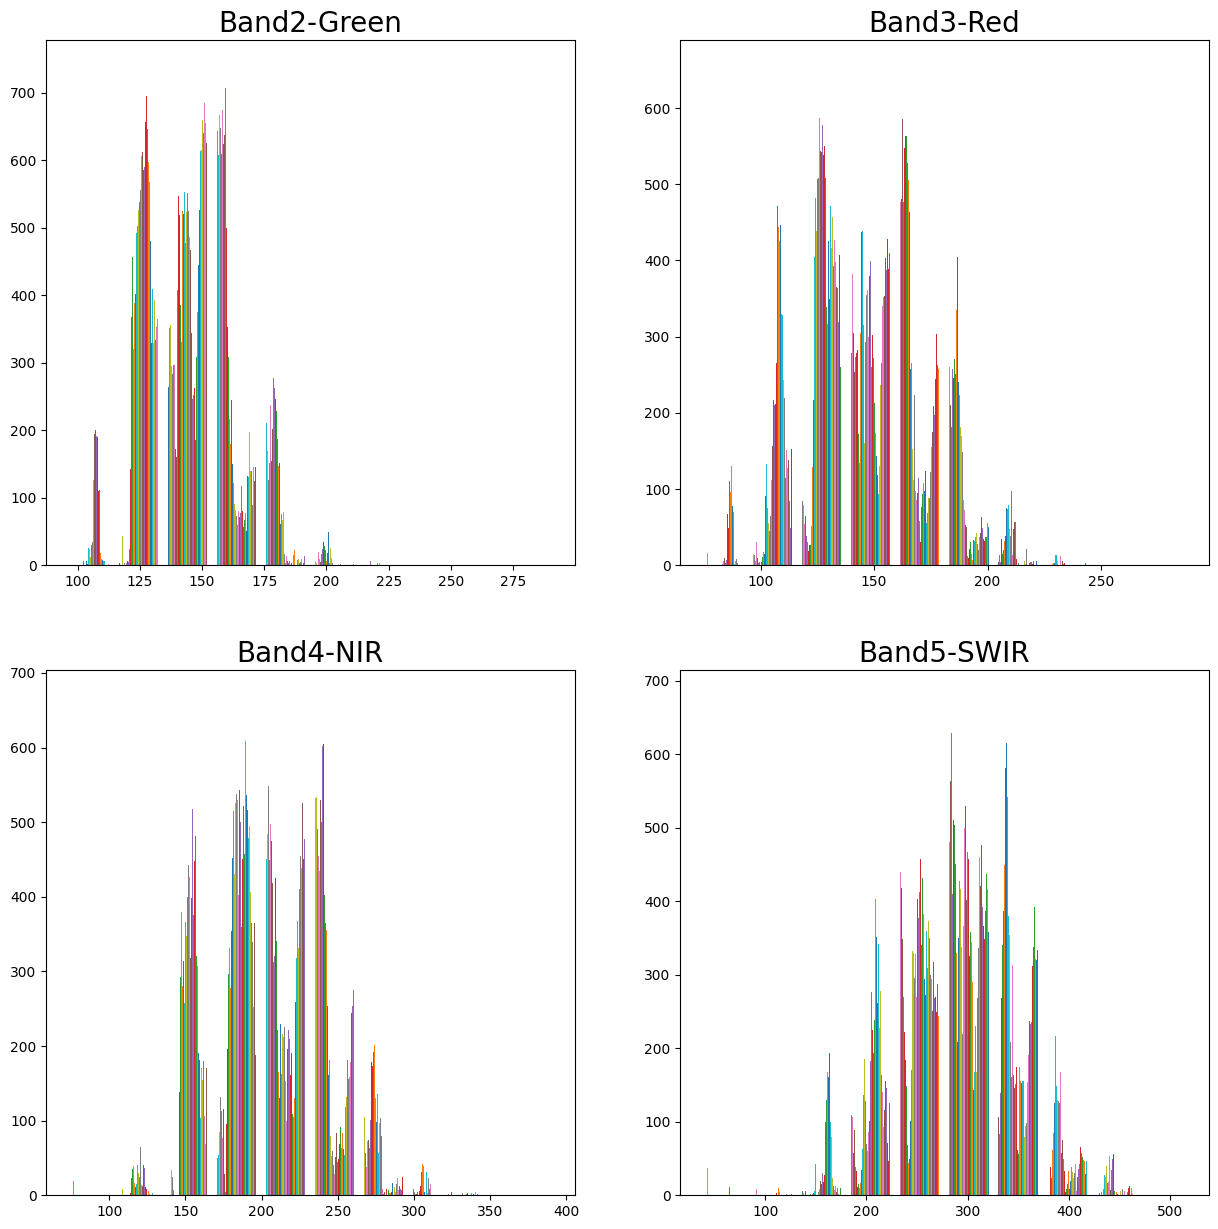

In [ ]:


plt.subplots(2,2, figsize=(15,15))

plt.subplot(2,2,1)
plt.hist(B2)
plt.title('Band2-Green', size=20)

plt.subplot(2,2,2)
plt.hist(B3)
plt.title('Band3-Red', size=20)

plt.subplot(2,2,3)
plt.hist(B4)
plt.title('Band4-NIR',size=20)

plt.subplot(2,2,4)
plt.hist(B5)
plt.title('Band5-SWIR',size=20)

plt.show()

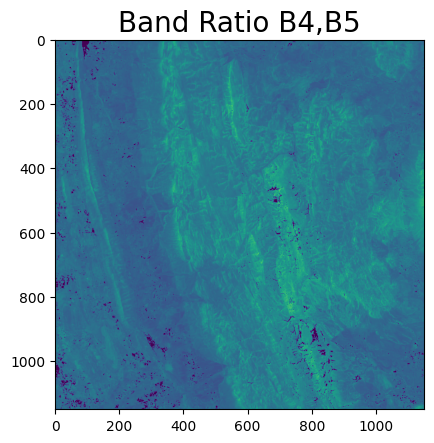

In [ ]:


NDVI=(B4-B5)/(B4+B5)#(NIR-SWIR/NIR+SWIR)

plt.imshow(NDVI)
plt.title('Band Ratio B4,B5', size=20)
plt.show()

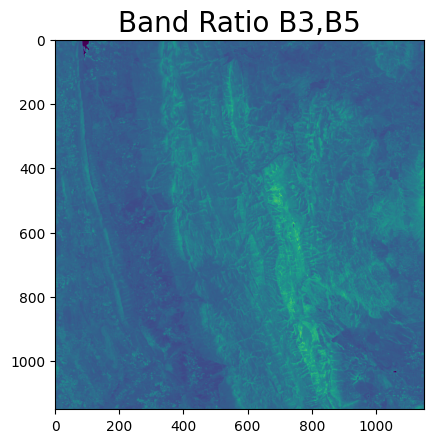

In [ ]:

NdVi = (B3-B5)/(B3+B5)#(RED-SWIR/RED+SWIR)

plt.imshow(NdVi)
plt.title("Band Ratio B3,B5", size=20)
plt.show()

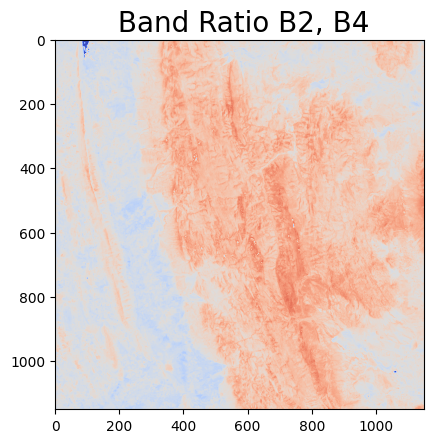

In [ ]:


Ndvi = (B2-B4)/(B4+B2)

plt.imshow(Ndvi, cmap='coolwarm')
plt.title(" Band Ratio B2, B4", size=20)
plt.show()

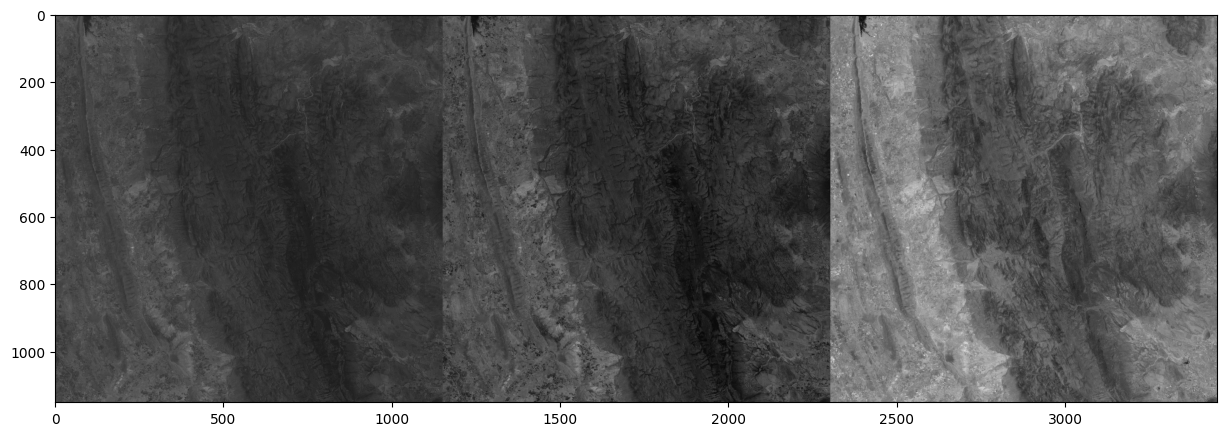

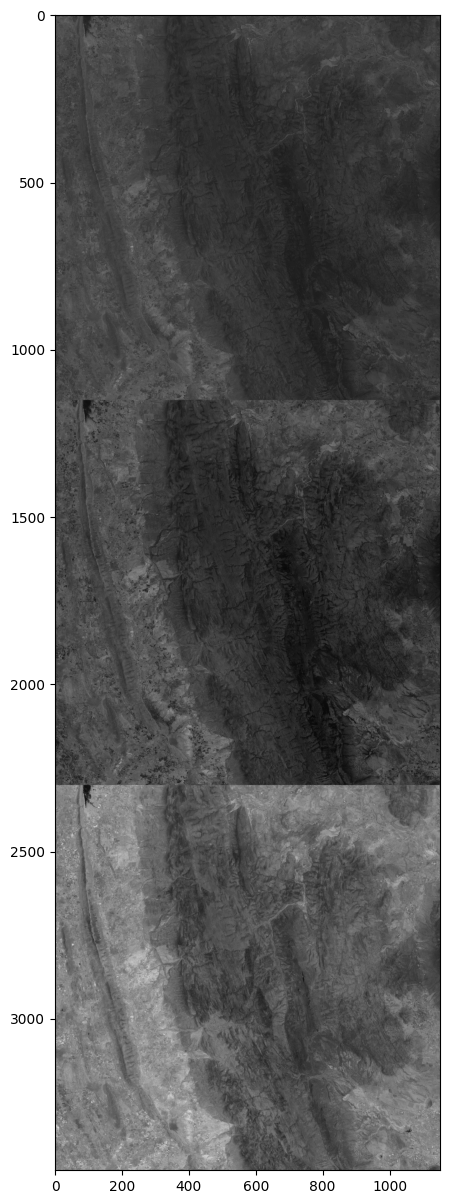

In [ ]:


bdsh= np.hstack([B2,B3,B4])
plt.figure(figsize=(15,15))
plt.imshow(bdsh, cmap='gray')
plt.show()

bdsv = np.vstack([B2,B3,B4])
plt.figure(figsize=(15,15))
plt.imshow(bdsv, cmap='gray')
plt.show()

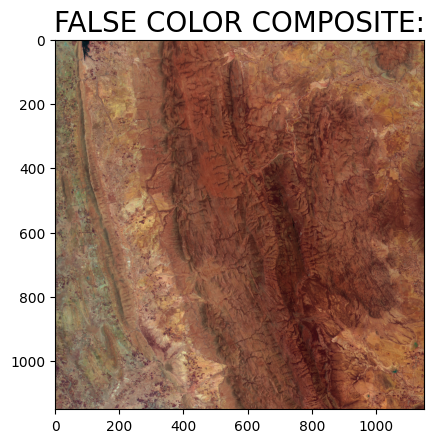

In [ ]:

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

B2n = normalize(B2)
B3n = normalize(B3)
B4n = normalize(B4)
B4n = normalize(B5)

RGB = np.dstack([B4n, B3n,B2n])#NIR,Red,Green

plt.imshow(RGB)
plt.title("FALSE COLOR COMPOSITE:", size= 20)
plt.show()

#CARTODEM 1arc sec  tile No 44B

In [ ]:

!pip install elevation

In [ ]:

!pip install richdem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp310-cp310-linux_x86_64.whl size=7844537 sha256=00b03786928e62305e7a7d136e0e3399db812e3719469a2ad8ad4a5d3134e280
  Stored in directory: /root/.cache/pip/wheels/01/61/27/5c305116b5cffecf04ed75c40f640e2baf231dae20954e31e0
Successfully built richdem


In [ ]:

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

In [ ]:


Cardem= gdal.Open('/content/sample_data/cdnd44b_v1.1r1.tif')
Cardem

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fc5312adfe0> >

In [ ]:

gdal.Info(Cardem, format='json')

{'description': '/content/sample_data/cdnd44b_v1.1r1.tif',
 'driverShortName': 'GTiff',
 'driverLongName': 'GeoTIFF',
 'files': ['/content/sample_data/cdnd44b_v1.1r1.tif'],
 'size': [3602, 3602],
 'coordinateSystem': {'wkt': 'GEOGCRS["WGS 84",\n    ENSEMBLE["World Geodetic System 1984 ensemble",\n        MEMBER["World Geodetic System 1984 (Transit)"],\n        MEMBER["World Geodetic System 1984 (G730)"],\n        MEMBER["World Geodetic System 1984 (G873)"],\n        MEMBER["World Geodetic System 1984 (G1150)"],\n        MEMBER["World Geodetic System 1984 (G1674)"],\n        MEMBER["World Geodetic System 1984 (G1762)"],\n        MEMBER["World Geodetic System 1984 (G2139)"],\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]],\n        ENSEMBLEACCURACY[2.0]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitude (Lat)",north,\n            ORDER[1],\n            ANGLEUNIT["de

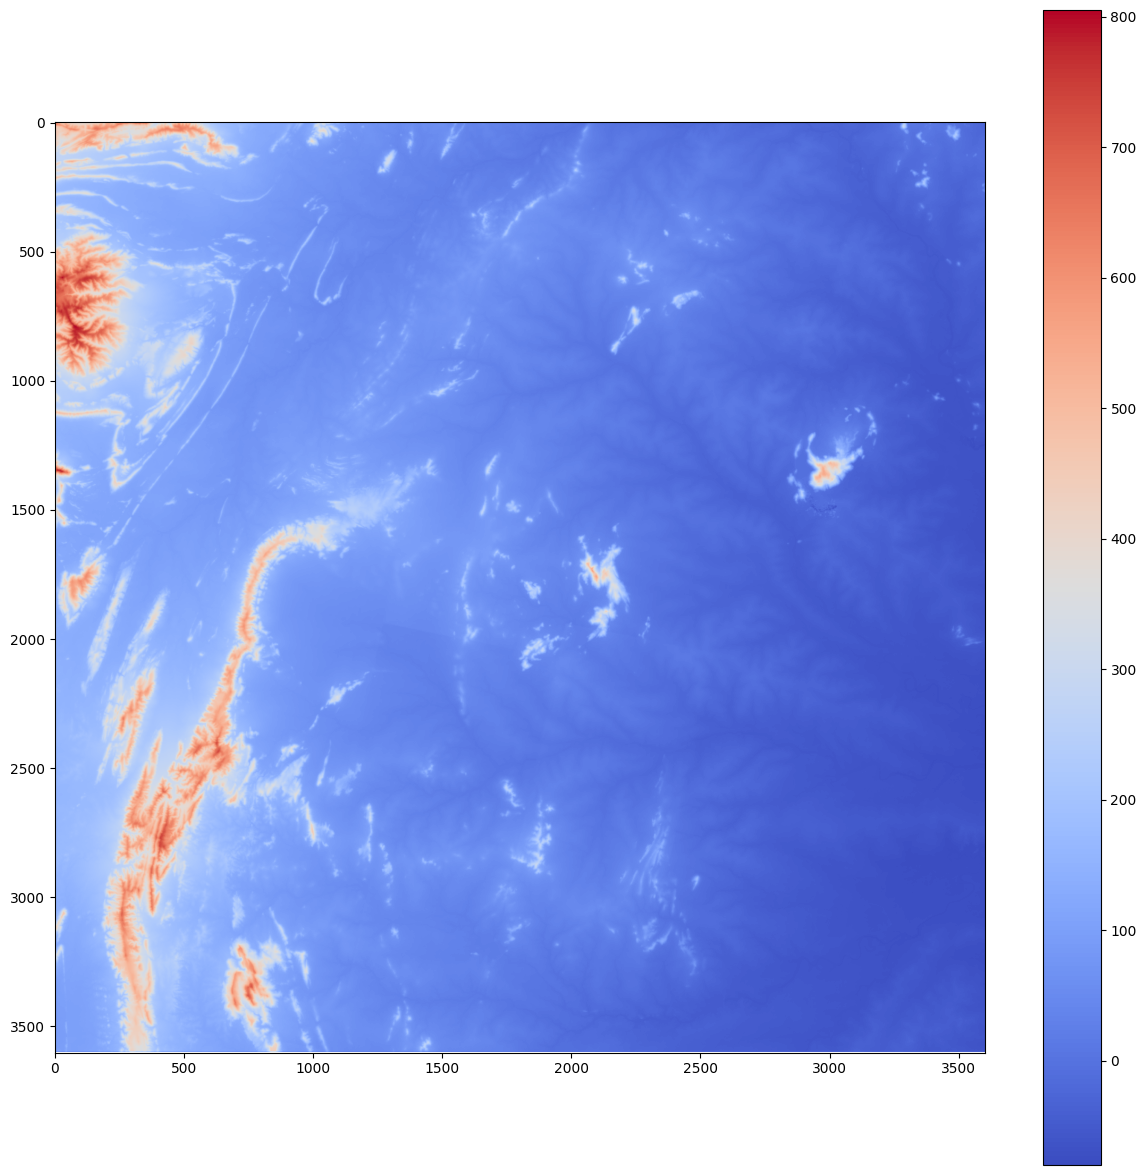

In [ ]:

band2= Cardem.ReadAsArray()

plt.figure(figsize=(15,15))
plt.imshow(band2, cmap= 'coolwarm')
plt.colorbar()
plt.show()

In [ ]:


Bandnum=Cardem.RasterCount
#metadata = Cardem.ReadAsArray(band_list=[3,2,1])
#metadata.shape
Bandnum

1

In [ ]:


display(Cardem.RasterXSize)
display(Cardem.RasterYSize)

3602

3602

In [ ]:
import rasterio as rio

CDem = rio.open('/content/sample_data/cdnd44b_v1.1r1.tif')
CDem.crs

CRS.from_epsg(4326)

In [ ]:

CDem.bounds

BoundingBox(left=78.99983918335253, bottom=14.999675450510752, right=80.00039473970854, top=16.000231006866752)

In [ ]:

#Longitude
display((80.00039473970854-78.99983918335253)/3602)

#Latitude
display((16.000231006866752-14.999675450510752)/3602)

0.00027777777800000144

0.0002777777779999999

In [ ]:

#Longitude
M1=400*0.00027777777800000144
M2=600*0.00027777777800000144
#Latitude
M3=400*0.0002777777779999999
M4=600*0.0002777777779999999
print(M1,'\n',M2,'\n',M3,'\n',M4)

0.11111111120000057 
 0.16666666680000086 
 0.11111111119999997 
 0.16666666679999995


In [ ]:


Min_lon=78.99983918335253+0.11111111120000057
Max_lon=78.99983918335253+0.16666666680000086
Min_lat=14.999675450510752+0.11111111119999997
Max_lat=14.999675450510752+0.16666666679999995

In [ ]:

print(Min_lon,'\n',Max_lon,'\n',Min_lat,'\n',Max_lat)

79.11095029455254 
 79.16650585015253 
 15.110786561710752 
 15.166342117310752


In [ ]:
#elevation.clip(bounds=(78.99983918335253, 14.999675450510752, 80.00039473970854, 16.000231006866752), output='/content/sample_data/cdem.tif', product='SRTM1')

In [ ]:

help(elevation.clip)

Help on function clip in module elevation.datasource:

clip(bounds, output='out.tif', margin='0', **kwargs)
    Clip the DEM to given bounds.
    
    :param bounds: Output bounds in 'left bottom right top' order.
    :param output: Path to output file. Existing files will be overwritten.
    :param margin: Decimal degree margin added to the bounds. Use '%' for percent margin.
    :param cache_dir: Root of the DEM cache folder.
    :param product: DEM product choice.



In [ ]:


s_dem= gdal.Open('/content/sample_data/cdnd44b_v1.1r1.tif')

shasta_dem = rd.LoadGDAL('/content/sample_data/cdnd44b_v1.1r1.tif', no_data=-9999)
rda= rd.rdarray(shasta_dem, no_data=-9999)

****************************************
Origin        : 78.99983918335253 16.000231006866752
pixel size. : 0.000277777778 -0.000277777778

s_dem
ULC: [78.99983918335253, 16.000231006866752]
URC: [80.00039473970854, 16.000231006866752]
LLC: [78.99983918335253, 14.999675450510752]
LRC: [80.00039473970854, 14.999675450510752]
center : [79.50011696153054, 15.499953228688751]


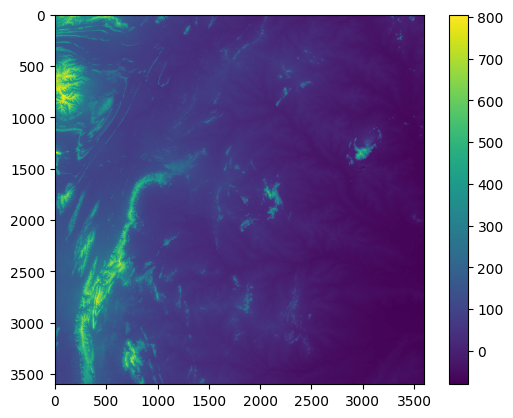

In [ ]:

gt= s_dem.GetGeoTransform()
print('*'*40)
print('Origin        :', gt[0],gt[3])
print('pixel size. :', gt[1],gt[5])
print('\ns_dem')
print('ULC:', gdal.ApplyGeoTransform(gt,0,0))
print('URC:', gdal.ApplyGeoTransform(gt,s_dem.RasterXSize,0))
print('LLC:', gdal.ApplyGeoTransform(gt,0,s_dem.RasterYSize))
print('LRC:', gdal.ApplyGeoTransform(gt, s_dem.RasterXSize, s_dem.RasterYSize))
print('center :', gdal.ApplyGeoTransform(gt, s_dem.RasterXSize/2, s_dem.RasterYSize/2))

plt.imshow(rda, interpolation='none')
plt.colorbar()
plt.show()

In [ ]:

C1=gdal.DEMProcessing('/content/sample_data/cdemdp.tif', s_dem, processing='slope')
display(C1.GetDescription())
display(C1.GetMetadata())
print(C1.GetProjection())

'/content/sample_data/cdemdp.tif'

{}

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [ ]:

help(rd.TerrainAttribute)

Help on function TerrainAttribute in module richdem:

TerrainAttribute(dem, attrib, zscale=1.0)
    Calculates terrain attributes. A variety of methods are available.
    
    Args:
        dem    (rdarray):  An elevation model
        attrib (str):      Terrain attribute to calculate. (See below.)
        zscale (float):    How much to scale the z-axis by prior to calculation
    
    ======================= =========
    Method                  Reference
    ======================= =========
    slope_riserun           `Horn (1981)                   doi: 10.1109/PROC.1981.11918 <http://dx.doi.org/10.1109/PROC.1981.11918>`_ 
    slope_percentage        `Horn (1981)                   doi: 10.1109/PROC.1981.11918 <http://dx.doi.org/10.1109/PROC.1981.11918>`_ 
    slope_degrees           `Horn (1981)                   doi: 10.1109/PROC.1981.11918 <http://dx.doi.org/10.1109/PROC.1981.11918>`_ 
    slope_radians           `Horn (1981)                   doi: 10.1109/PROC.1981.11918 <http://

[[624 629 629 ... -26 -27   0]
 [620 623 627 ... -26 -27   0]
 [616 619 624 ... -27 -27   0]
 ...
 [100 100 100 ... -59 -60   0]
 [100 101 101 ... -59 -60   0]
 [  0   0   0 ...   0   0   0]]
----------------------------------------
[[624 629 629 ... -26 -27   0]
 [620 623 627 ... -26 -27   0]
 [616 619 624 ... -27 -27   0]
 ...
 [100 100 100 ... -59 -60   0]
 [100 101 101 ... -59 -60   0]
 [  0   0   0 ...   0   0   0]]
****************************************
(3602, 3602)
(3602, 3602)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


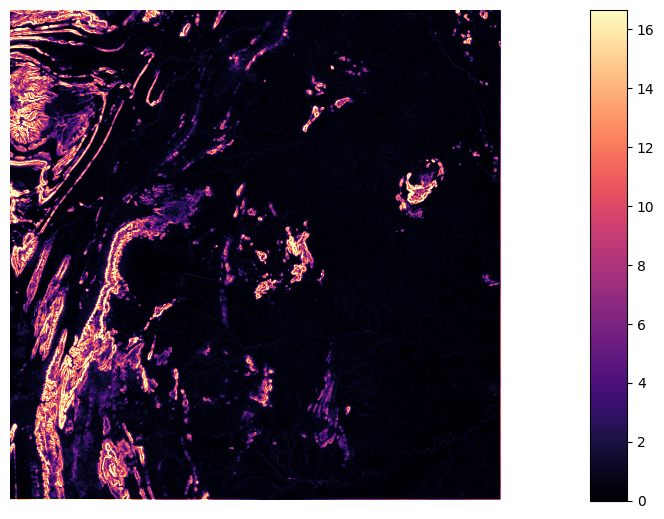

In [ ]:


nda1= s_dem.ReadAsArray()

#ReadAsArray(self, xoff=0, yoff=0, win_xsize=None, win_ysize=None, buf_xsize=None, buf_ysize=None, buf_obj=None)
#method of osgeo.gdal.Band instance

Npa1= rd.rdarray(nda1, no_data=-9999)

print(nda1)
print('-'*40)
print(Npa1)
print('*'*40)
print(nda1.shape)
print(Npa1.shape)

slope = rd.TerrainAttribute(Npa1, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

In [ ]:

aspect = rd.TerrainAttribute(Npa1, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(20, 16))
plt.show()

In [ ]:


Pc= rd.TerrainAttribute(Npa1, attrib='planform_curvature')
rd.rdShow(Pc, axes=False, cmap='jet', figsize=(20, 16))
plt.show()#planform_curvature

In [ ]:

80.00039473970854-78.99983918335253
#Longitudinal distance at the equator

1.0005555563560051

In [ ]:


(2*3.14*6371*1000)/(360*60*60)
#meters

30.871820987654328

In [ ]:

(30.871820987654328*60*60)/1000
#Kilometers

111.1385555555556

In [ ]:

111.1385555555556*1.0005555563560051
#kilometers

111.20029928649171

#Earth Exp
eviirs_global_ndvi_65f787f26cef2bb3

In [ ]:

Del1= gpd.read_file('/content/sample_data/eviirs_global_ndvi_65f787f26cef2bb3.shp')
Del1

Entity ID   Platform Sensor     Agency  Map Projec  \
0    EVGNDVIS20140101201401101  SUOMI NPP  VIIRS  USGS EROS  Geographic   
1    EVGNDVIS20140111201401201  SUOMI NPP  VIIRS  USGS EROS  Geographic   
2    EVGNDVIS20140121201401311  SUOMI NPP  VIIRS  USGS EROS  Geographic   
3    EVGNDVIS20140201201402101  SUOMI NPP  VIIRS  USGS EROS  Geographic   
4    EVGNDVIS20140211201402201  SUOMI NPP  VIIRS  USGS EROS  Geographic   
..                         ...        ...    ...        ...         ...   
354  EVGNDVIS20231111202311201  SUOMI NPP  VIIRS  USGS EROS  Geographic   
355  EVGNDVIS20231121202311301  SUOMI NPP  VIIRS  USGS EROS  Geographic   
356  EVGNDVIS20231201202312101  SUOMI NPP  VIIRS  USGS EROS  Geographic   
357  EVGNDVIS20231211202312201  SUOMI NPP  VIIRS  USGS EROS  Geographic   
358  EVGNDVIS20231221202312311  SUOMI NPP  VIIRS  USGS EROS  Geographic   

     Pixel Reso  Begin Date    End Date      Center Lat     Center Lon  ...  \
0    1000 meter  2014-01-01  2014-01-10  10&deg;00'00"N  0&deg;00'00"E  ...   
1    1000 meter  2014-01-11  2014-01-20  10&deg;00'00"N  0&deg;00'00"E  ...   
2    1000 meter  2014-01-21  2014-01-31  10&deg;00'00"N  0&deg;00'00"E  ...   
3    1000 meter  2014-02-01  2014-02-10  10&deg;00'00"N  0&deg;00'00"E  ...   
4    1000 meter  2014-02-11  2014-02-20  10&deg;00'00"N  0&deg;00'00"E  ...   
..          ...         ...         ...             ...            ...  ...   
354  1000 meter  2023-11-11  2023-11-20  10&deg;00'00"N  0&deg;00'00"E  ...   
355  1000 meter  2023-11-21  2023-11-30  10&deg;00'00"N  0&deg;00'00"E  ...   
356  1000 meter  2023-12-01  2023-12-10  10&deg;00'00"N  0&deg;00'00"E  ...   
357  1000 meter  2023-12-11  2023-12-20  10&deg;00'00"N  0&deg;00'00"E  ...   
358  1000 meter  2023-12-21  2023-12-31  10&deg;00'00"N  0&deg;00'00"E  ...   

    Center L_2 NW Corne_2 NW Corne_3 NE Corne_2 NE Corne_3 SE Corne_2  \
0            0         80       -180         80        180        -60   
1            0         80       -180         80        180        -60   
2            0         80       -180         80        180        -60   
3            0         80       -180         80        180        -60   
4            0         80       -180         80        180        -60   
..         ...        ...        ...        ...        ...        ...   
354          0         80       -180         80        180        -60   
355          0         80       -180         80        180        -60   
356          0         80       -180         80        180        -60   
357          0         80       -180         80        180        -60   
358          0         80       -180         80        180        -60   

    SE Corne_3 SW Corne_2 SW Corne_3  \
0          180        -60       -180   
1          180        -60       -180   
2          180        -60       -180   
3          180        -60       -180   
4          180        -60       -180   
..         ...        ...        ...   
354        180        -60       -180   
355        180        -60       -180   
356        180        -60       -180   
357        180        -60       -180   
358        180        -60       -180   

                                              geometry  
0    POLYGON ((-180.00000 -60.00000, -180.00000 80....  
1    POLYGON ((-180.00000 -60.00000, -180.00000 80....  
2    POLYGON ((-180.00000 -60.00000, -180.00000 80....  
3    POLYGON ((-180.00000 -60.00000, -180.00000 80....  
4    POLYGON ((-180.00000 -60.00000, -180.00000 80....  
..                                                 ...  
354  POLYGON ((-180.00000 -60.00000, -180.00000 80....  
355  POLYGON ((-180.00000 -60.00000, -180.00000 80....  
356  POLYGON ((-180.00000 -60.00000, -180.00000 80....  
357  POLYGON ((-180.00000 -60.00000, -180.00000 80....  
358  POLYGON ((-180.00000 -60.00000, -180.00000 80....  

[359 rows x 29 columns]

In [ ]:

type(Del1)

geopandas.geodataframe.GeoDataFrame